
# Part One



In [48]:

import numpy as np

import pandas as pd

# load the data into a data frame
cancer_df = pd.read_csv("https://github.com/mpourhoma/CS4662/raw/master/Cancer.csv")





# Part Two



In [49]:

# train test split

from sklearn.model_selection import train_test_split


cancer_features_cols = list(cancer_df.columns)

cancer_features_cols.remove('Malignant_Cancer')

cancer_features = cancer_df[cancer_features_cols]

cancer_labels = cancer_df['Malignant_Cancer']


Features_Train, Features_Test, Labels_Train, Labels_Test = train_test_split(cancer_features, 
                                                                            cancer_labels, test_size = 0.3,random_state = 2)





# Part Three




In [50]:

# accuracy score and area under the curve for 
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

from sklearn import metrics

dec_tree_clssr = DecisionTreeClassifier(random_state = 2)

dec_tree_clssr.fit(Features_Train, Labels_Train)

dec_tree_prediction = dec_tree_clssr.predict(Features_Test)

dec_tree_acc = accuracy_score(Labels_Test, dec_tree_prediction )

dec_tree_label_proba = dec_tree_clssr.predict_proba(Features_Test)

# dec tree roc curve
DT_FPR, DT_TPR, thresholds = metrics.roc_curve ( Labels_Test,
                                                               dec_tree_label_proba[:,1], pos_label=1 )
# dec tree auc
DT_auc = metrics.auc(DT_FPR, DT_TPR)

print ( 'Accuracy Score: ' + str(dec_tree_acc ) )

print ( 'Area Under the Curve: ' + str( DT_auc))



Accuracy Score: 0.8666666666666667
Area Under the Curve: 0.8697478991596639




# Part Four


In [51]:

# accuracy score and area under the curve for
# Bagging method using Decision Trees


import numpy as np

import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

from sklearn import metrics

from sklearn.utils import resample

from collections import Counter


rows_of_cancer_df = len(cancer_df.index)

bootstrap_size = int(0.8 * rows_of_cancer_df)



base_dec_tree_predictions = []



for i in range (0, 29, 1):
    
    ft_train_rs = resample( Features_Train, n_samples = bootstrap_size, random_state = i, replace = True)
    
    lb_train_rs = resample( Labels_Train, n_samples = bootstrap_size, random_state = i, replace = True)
    
    base_dec_tree = DecisionTreeClassifier(random_state = 2)
    
    base_dec_tree.fit(ft_train_rs, lb_train_rs)
    
    cur_predict = base_dec_tree.predict( Features_Test )
    
    base_dec_tree_predictions.append ( cur_predict )
    


    
    
# voting for accuracy score for bagging

result_df = pd.DataFrame( data = base_dec_tree_predictions)

dec_tree_pred_list = []

dec_tree_final_preds_list = []

for current_column in result_df.columns:
    
    cur_col_list = result_df[current_column].tolist()
    
    dec_tree_pred_list.append(cur_col_list)
    
    

for current_row in dec_tree_pred_list:
    
    current_row_counter = Counter (current_row)
    
    if current_row_counter[1] > current_row_counter[0]:
        dec_tree_final_preds_list.append(1)
        
    elif current_row_counter[0] > current_row_counter[1]:
        dec_tree_final_preds_list.append(0)
        
    else:
        dec_tree_final_preds_list.append(0)

bagging_acc_rate = accuracy_score ( Labels_Test, dec_tree_final_preds_list)



# calculating AUC for bagging

result_df_transposed = result_df.transpose(copy=True)

result_df_tranposed_lists = result_df_transposed.values.tolist()

list_of_sample_probas = []

for current_row in result_df_tranposed_lists:
    
    current_row_counter = Counter ( current_row )
    
    number_of_zeros = current_row_counter[0]
    
    number_of_ones = current_row_counter[1]
    
    proba_of_neg = number_of_zeros / len(current_row)

    proba_of_pos = number_of_ones / len(current_row)

    list_of_sample_probas.append ( [ proba_of_neg , proba_of_pos ] )
    
list_of_sample_probas_ndarray = np.array( list_of_sample_probas )
    
DT_BAG_FPR, DT_BAG_TPR, DT_BAG_thresholds = metrics.roc_curve( Labels_Test, list_of_sample_probas_ndarray[:, 1], pos_label= 1)

DT_BAG_AUC = metrics.auc( DT_BAG_FPR, DT_BAG_TPR )


print ( 'Bagging method using decision trees accuracy score: ' + str (bagging_acc_rate) )

print ( 'Bagging method using decision trees AUC: ' +  str(DT_BAG_AUC) )




Bagging method using decision trees accuracy score: 0.8666666666666667
Bagging method using decision trees AUC: 0.935924369747899





# Part Five





In [52]:

# accuracy score and area under the curve for 
# AdaBoost Classifier

from sklearn.ensemble import AdaBoostClassifier

ada_boost_clssr = AdaBoostClassifier(n_estimators = 29, random_state= 2)


ada_boost_clssr.fit ( Features_Train, Labels_Train )

ada_boost_c_predictions = ada_boost_clssr.predict( Features_Test )

ada_boost_c_acc = accuracy_score ( Labels_Test, ada_boost_c_predictions )

#print ( ada_boost_c_acc )

ada_boost_labels_proba = ada_boost_clssr.predict_proba( Features_Test )

# adaboost roc curve
ADBC_FPR, ADBC_TPR, ADBC_thresholds = metrics.roc_curve( Labels_Test, ada_boost_labels_proba[:, 1], pos_label =1 )

# adaboost auc
ADBC_AUC = metrics.auc ( ADBC_FPR, ADBC_TPR )

print ( 'AdaBoostClassifier accuracy score: ' + str( ada_boost_c_acc ) )

print ( 'AdaBoostClassifier Area Under the Curve: ' + str ( ADBC_AUC ))




AdaBoostClassifier accuracy score: 0.9555555555555556
AdaBoostClassifier Area Under the Curve: 0.9653361344537815



# Part Six


In [53]:

# accuracy score and area under the curve for
# XGBoost Classifier



from xgboost import XGBClassifier

xgb_clssr = XGBClassifier( n_estimators= 29, random_state = 2, use_label_encoder = False)

xgb_clssr.fit ( Features_Train, Labels_Train, eval_metric ='logloss')

xgbc_predictions = xgb_clssr.predict ( Features_Test )

xgbc_acc = accuracy_score ( Labels_Test, xgbc_predictions  )

xgbc_labels_proba = xgb_clssr.predict_proba( Features_Test )

XGBC_FPR, XGBC_TPR, XGBC_thresholds = metrics.roc_curve ( Labels_Test, xgbc_labels_proba[:, 1], pos_label=1 )

XGBC_AUC = metrics.auc ( XGBC_FPR, XGBC_TPR )

print ( 'XGBoost Classifier accuracy score: ' + str ( xgbc_acc ) )

print ( 'XGBoost Classifier AUC: ' + str ( XGBC_AUC ))




XGBoost Classifier accuracy score: 0.9555555555555556
XGBoost Classifier AUC: 0.9716386554621849




# Part Seven


In [54]:


# accuracy score and area under the curve for
# Random Forest Classifier


from sklearn.ensemble import RandomForestClassifier

rand_for_clssr = RandomForestClassifier( n_estimators = 29, bootstrap = True, random_state = 2)

rand_for_clssr.fit ( Features_Train, Labels_Train )

rand_for_predictions = rand_for_clssr.predict( Features_Test )

rand_for_acc = accuracy_score ( Labels_Test, rand_for_predictions )

rand_for_labels_proba = rand_for_clssr.predict_proba( Features_Test )

RF_FPR, RF_TPR, RF_thresholds = metrics.roc_curve ( Labels_Test, rand_for_labels_proba[:, 1], pos_label = 1 )

RF_AUC = metrics.auc ( RF_FPR, RF_TPR )

print ( 'Random Forest Classifier accuracy score: ' + str( rand_for_acc ))

print ( 'Random Forest Classifier Area Under the Curve: ' + str( RF_AUC ))


Random Forest Classifier accuracy score: 0.9555555555555556
Random Forest Classifier Area Under the Curve: 0.9516806722689075



# Part Eight




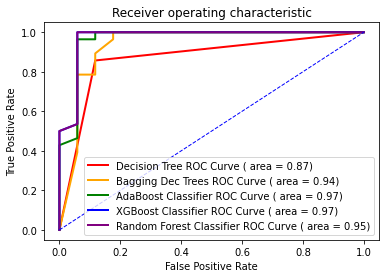

In [55]:


#codes for plotting the AUC values of each algorithm
# using matplotlib


import matplotlib.pyplot as plt

%matplotlib inline


plt.figure()


# decision tree plot

plt.plot( DT_FPR, DT_TPR, color='red', lw= 2, 
           label='Decision Tree ROC Curve ( area = %0.2f)' % DT_auc )


# bagging with decision trees plot


plt.plot( DT_BAG_FPR, DT_BAG_TPR, color='orange', lw= 2, 
           label='Bagging Dec Trees ROC Curve ( area = %0.2f)' % DT_BAG_AUC )



# adaboost plot

plt.plot( ADBC_FPR, ADBC_TPR, color='green', lw= 2, 
           label='AdaBoost Classifier ROC Curve ( area = %0.2f)' % ADBC_AUC )


# xgboost plot

plt.plot( XGBC_FPR, XGBC_TPR, color='blue', lw= 2, 
           label='XGBoost Classifier ROC Curve ( area = %0.2f)' % XGBC_AUC )

# random forest plot


plt.plot( XGBC_FPR, XGBC_TPR, color='purple', lw= 2, 
           label='Random Forest Classifier ROC Curve ( area = %0.2f)' % RF_AUC )


# random guess plot
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')


# plot legends
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()




In [56]:

# comparing AUC values for each algorithm

print ( 'Decision Tree Area Under the Curve: ' + str( DT_auc))

print ( 'Bagging Method Area Under the Curve: ' + str(DT_BAG_AUC ) )

print ( 'AdaBoostClassifier Area Under the Curve: ' + str ( ADBC_AUC ))

print ( 'XGBoost Classifier AUC: ' + str ( XGBC_AUC ))

print ( 'Random Forest Classifier Area Under the Curve: ' + str( RF_AUC ))


Decision Tree Area Under the Curve: 0.8697478991596639
Bagging Method Area Under the Curve: 0.935924369747899
AdaBoostClassifier Area Under the Curve: 0.9653361344537815
XGBoost Classifier AUC: 0.9716386554621849
Random Forest Classifier Area Under the Curve: 0.9516806722689075



Based on the results, the best algorithm w.r.t the AUC value is the XGBoost Classifier.



In [57]:

# comparing the accuracy score for each algorithm


print ( 'Decision Tree Accuracy Score: ' + str(dec_tree_acc) )

print ( 'Bagging Method with Decision Tree Accuracy Score: ' + str ( bagging_acc_rate ))

print ( 'AdaBoostClassifier Accuracy Score: ' + str( ada_boost_c_acc ) )

print ( 'XGBoost Classifier Accuracy Score: ' + str ( xgbc_acc ) )

print ( 'Random Forest Classifier Accuracy Score: ' + str( rand_for_acc ))


Decision Tree Accuracy Score: 0.8666666666666667
Bagging Method with Decision Tree Accuracy Score: 0.8666666666666667
AdaBoostClassifier Accuracy Score: 0.9555555555555556
XGBoost Classifier Accuracy Score: 0.9555555555555556
Random Forest Classifier Accuracy Score: 0.9555555555555556



Based on the results, the ensemble classifier algorithms seem to tie w.r.t the Accuracy value.



In [59]:

# comparing False Positive Rates
# each variable is an array

print ( 'Decision Tree False Positive Rate: ' + str(DT_FPR) + '\n')

print ( 'Bagging Method with Decision Trees False Positive Rate: ' + str (DT_BAG_FPR) + '\n')

print ( 'AdaBoostClassifier False Positive Rate: ' + str( ADBC_FPR ) + '\n')

print ( 'XGBoost Classifier False Positive Rate: ' + str( XGBC_FPR ) + '\n')

print ( 'Random Forest Classifier False Positive Rate: ' + str ( RF_FPR ) + '\n')



Decision Tree False Positive Rate: [0.         0.11764706 1.        ]

Bagging Method with Decision Trees False Positive Rate: [0.         0.05882353 0.05882353 0.05882353 0.11764706 0.11764706
 0.17647059 0.17647059 0.29411765 0.35294118 1.        ]

AdaBoostClassifier False Positive Rate: [0.         0.         0.         0.         0.         0.
 0.         0.05882353 0.05882353 0.11764706 0.11764706 0.35294118
 0.52941176 1.        ]

XGBoost Classifier False Positive Rate: [0.         0.         0.         0.         0.         0.05882353
 0.05882353 0.23529412 0.35294118 0.52941176 1.        ]

Random Forest Classifier False Positive Rate: [0.         0.05882353 0.05882353 0.05882353 0.05882353 0.05882353
 0.05882353 0.29411765 1.        ]




Given that each of these fpr values are actual arrays, I tried computing the average of each. <br>
But each array has an average above 0.07.

The below codes are manually constructed confusion matrices for each algorithm.

In [60]:

# codes used to manually calculate the False Positive Rates
# other values are calculated as need to find the 
# False Positive Rates

from sklearn.metrics import confusion_matrix

DT_CF_MAT = confusion_matrix(Labels_Test, dec_tree_prediction)

DT_BG_CF_MAT = confusion_matrix(Labels_Test, dec_tree_final_preds_list)

ADB_CF_MAT = confusion_matrix(Labels_Test, ada_boost_c_predictions)

XGB_CF_MAT = confusion_matrix( Labels_Test, xgbc_predictions )

RF_CF_MAT = confusion_matrix( Labels_Test, rand_for_predictions)




DT_FP = DT_CF_MAT.sum(axis=0) - np.diag (DT_CF_MAT)

DT_FN = DT_CF_MAT.sum(axis=1) - np.diag (DT_CF_MAT)

DT_TP = np.diag (DT_CF_MAT)

DT_TN = DT_CF_MAT.sum() - (DT_FP + DT_FN + DT_TP)


DT_CF_FPR = DT_FP/ (DT_FP + DT_TN  )




DT_BG_FP = DT_BG_CF_MAT.sum(axis=0) - np.diag (DT_BG_CF_MAT)

DT_BG_FN = DT_BG_CF_MAT.sum(axis=1) - np.diag (DT_BG_CF_MAT)

DT_BG_TP = np.diag (DT_BG_CF_MAT)

DT_BG_TN = DT_BG_CF_MAT.sum() - (DT_BG_FP + DT_BG_FN + DT_BG_TP)


DT_BG_FPR = DT_BG_FP / (DT_BG_FP + DT_BG_TN )




ADB_FP = ADB_CF_MAT.sum(axis=0) - np.diag (ADB_CF_MAT)

ADB_FN = ADB_CF_MAT.sum(axis=1) - np.diag (ADB_CF_MAT)

ADB_TP = np.diag (ADB_CF_MAT)

ADB_TN = ADB_CF_MAT.sum() - (ADB_FP + ADB_FN + ADB_TP)


ADB_FPR = ADB_FP / (ADB_FP + ADB_TN)



XGB_FP = XGB_CF_MAT.sum(axis=0) - np.diag (XGB_CF_MAT)

XGB_FN = XGB_CF_MAT.sum(axis=1) - np.diag (XGB_CF_MAT)

XGB_TP = np.diag (XGB_CF_MAT)

XGB_TN = XGB_CF_MAT.sum() - (XGB_FP + XGB_FN + XGB_TP)


XGB_FPR = XGB_FP / (XGB_FP + XGB_TN)






RF_FP = RF_CF_MAT.sum(axis=0) - np.diag (RF_CF_MAT)

RF_FN = RF_CF_MAT.sum(axis=1) - np.diag (RF_CF_MAT)

RF_TP = np.diag (RF_CF_MAT)

RF_TN = RF_CF_MAT.sum() - (RF_FP + RF_FN + RF_TP)


RF_FPR = RF_FP / (RF_FP + RF_TN)


print (DT_CF_FPR )

print (DT_BG_FPR )

print (ADB_FPR )

print (XGB_FPR )

print (RF_FPR )




[0.14285714 0.11764706]
[0.14285714 0.11764706]
[0.03571429 0.05882353]
[0.03571429 0.05882353]
[0.         0.11764706]



Based on these results from manually computing the values each confusion matrix for each algorithm <br>
the two algorithms to use if we want False Positive Rates below 7% would be a tie between <br>
AdaBoost Classifier and the XGBoost Classifier.

